# pandas.crosstab
## Agenda

- `pandas.crosstab`の引数と挙動を確認
- 自動車の車種とブランド別出現頻度の集計
- `pandas.crosstab`と`sns.heatmap`の組み合わせ

## 参考

- https://pbpython.com/pandas-crosstab.html


### Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Pandas version

In [2]:
pd.__version__

'1.0.3'

## 1. pandas.crosstabの引数と挙動
### Syntax

```
pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False)
```

### 機能

Compute a simple cross tabulation of two (or more) factors.

### Return

DataFrame

### Params

- index: array-like, Series, or list of arrays/Series

Values to group by in the rows.

- columns: array-like, Series, or list of arrays/Series

Values to group by in the columns.

- values: array-like, optional

Array of values to aggregate according to the factors. Requires aggfunc be specified.

- rownames: sequence, default None

If passed, must match number of row arrays passed.

- colnames: sequence, default None

If passed, must match number of column arrays passed.

- aggfunc: function, optional

If specified, requires values be specified as well.

- margins: bool, default False

Add row/column margins (subtotals).

- margins_name: str, default ‘All’

Name of the row/column that will contain the totals when margins is True.

- dropna: bool, default True

Do not include columns whose entries are all NaN.

- normalize: bool, `{‘all’, ‘index’, ‘columns’}`, or `{0,1}`, default False

Normalize by dividing all values by the sum of values.
If passed ‘all’ or True, will normalize over all values.
If passed ‘index’ will normalize over each row.
If passed ‘columns’ will normalize over each column.
If margins is True, will also normalize margin values.

### Example: 出現頻度のカウント

In [3]:
a = np.array(["foo", "foo", "foo", "foo", "bar", "bar",
              "bar", "bar", "foo", "foo", "foo"], dtype=object)
b = np.array(["one", "one", "one", "two", "one", "one",
              "one", "two", "two", "two", "one"], dtype=object)
c = np.array(["dull", "dull", "shiny", "dull", "dull", "shiny",
              "shiny", "dull", "shiny", "shiny", "shiny"],
             dtype=object)
pd.crosstab(a, [b, c], rownames=['a'], colnames=['b', 'c'])

b    one        two      
c   dull shiny dull shiny
a                        
bar    1     2    1     0
foo    2     2    1     2

### `dropna = False`の動作確認

In [4]:
foo = pd.Categorical(['a', 'b'], categories=['a', 'b', 'c'])
bar = pd.Categorical(['d', 'e'], categories=['d', 'e', 'f'])
pd.crosstab(foo, bar)

col_0,d,e
row_0,,
a,1,0
b,0,1


In [5]:
pd.crosstab(foo, bar, dropna = False)

col_0,d,e,f
row_0,,,
a,1,0,0
b,0,1,0
c,0,0,0


## 2. 自動車のブランドと種別出現頻度の抽出

In [6]:
# Define the headers since the data does not have any
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

# Read in the CSV file and convert "?" to NaN
df_raw = pd.read_csv("http://mlr.cs.umass.edu/ml/machine-learning-databases/autos/imports-85.data",
                     header=None, names=headers, na_values="?" )
df_raw.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


データのsubsetを抽出

In [7]:
# Define a list of models that we want to review
models = ["toyota","nissan","mazda", "honda", "mitsubishi", "subaru", "volkswagen", "volvo"]

# Create a copy of the data with only the top 8 manufacturers
df = df_raw[df_raw.make.isin(models)].copy()

In [8]:
pd.crosstab(df.make, df.body_style, margins = True, margins_name = 'Total')

body_style,convertible,hardtop,hatchback,sedan,wagon,Total
make,,,,,,
honda,0,0,7,5,1,13
mazda,0,0,10,7,0,17
mitsubishi,0,0,9,4,0,13
nissan,0,1,5,9,3,18
subaru,0,0,3,5,4,12
toyota,1,3,14,10,4,32
volkswagen,1,0,1,9,1,12
volvo,0,0,0,8,3,11
Total,2,4,49,57,16,128


`pandas.DataFrame.groupby`でも同様の集計を実行することができる

In [9]:
df.groupby(['make', 'body_style'])['body_style'].count().unstack().fillna(0)

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0.0,0.0,7.0,5.0,1.0
mazda,0.0,0.0,10.0,7.0,0.0
mitsubishi,0.0,0.0,9.0,4.0,0.0
nissan,0.0,1.0,5.0,9.0,3.0
subaru,0.0,0.0,3.0,5.0,4.0
toyota,1.0,3.0,14.0,10.0,4.0
volkswagen,1.0,0.0,1.0,9.0,1.0
volvo,0.0,0.0,0.0,8.0,3.0


In [10]:
df.pivot_table(index='make', columns='body_style', aggfunc={'body_style':len}, fill_value=0)

body_style                              
body_style convertible hardtop hatchback sedan wagon
make                                                
honda                0       0         7     5     1
mazda                0       0        10     7     0
mitsubishi           0       0         9     4     0
nissan               0       1         5     9     3
subaru               0       0         3     5     4
toyota               1       3        14    10     4
volkswagen           1       0         1     9     1
volvo                0       0         0     8     3

### Normalization

In [11]:
pd.crosstab(df.make, df.body_style, margins = True, margins_name = 'Total', normalize = True).round(3)

body_style,convertible,hardtop,hatchback,sedan,wagon,Total
make,,,,,,
honda,0.000,0.000,0.055,0.039,0.008,0.102
mazda,0.000,0.000,0.078,0.055,0.000,0.133
mitsubishi,0.000,0.000,0.070,0.031,0.000,0.102
nissan,0.000,0.008,0.039,0.070,0.023,0.141
subaru,0.000,0.000,0.023,0.039,0.031,0.094
toyota,0.008,0.023,0.109,0.078,0.031,0.250
volkswagen,0.008,0.000,0.008,0.070,0.008,0.094
volvo,0.000,0.000,0.000,0.062,0.023,0.086
Total,0.016,0.031,0.383,0.445,0.125,1.000


column方向でnormalizationを実施する

In [12]:
pd.crosstab(df.make, df.body_style, normalize = 'columns').round(3)

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0.0,0.00,0.143,0.088,0.062
mazda,0.0,0.00,0.204,0.123,0.000
mitsubishi,0.0,0.00,0.184,0.070,0.000
nissan,0.0,0.25,0.102,0.158,0.188
subaru,0.0,0.00,0.061,0.088,0.250
toyota,0.5,0.75,0.286,0.175,0.250
volkswagen,0.5,0.00,0.020,0.158,0.062
volvo,0.0,0.00,0.000,0.140,0.188


row方向でnormalizationを実施する場合は

In [13]:
pd.crosstab(df.make, df.body_style, normalize='index').round(3)

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0.000,0.000,0.538,0.385,0.077
mazda,0.000,0.000,0.588,0.412,0.000
mitsubishi,0.000,0.000,0.692,0.308,0.000
nissan,0.000,0.056,0.278,0.500,0.167
subaru,0.000,0.000,0.250,0.417,0.333
toyota,0.031,0.094,0.438,0.312,0.125
volkswagen,0.083,0.000,0.083,0.750,0.083
volvo,0.000,0.000,0.000,0.727,0.273


## 3. `aggfunc`を用いた集計

In [14]:
pd.crosstab(df.make, df.body_style, values=df.curb_weight, aggfunc='mean').round(1)

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,NaN,NaN,1970.0,2288.8,2024.0
mazda,NaN,NaN,2253.5,2361.1,NaN
mitsubishi,NaN,NaN,2376.6,2394.0,NaN
nissan,NaN,2008.0,2740.2,2237.9,2452.3
subaru,NaN,NaN,2136.7,2314.0,2453.8
toyota,2975.0,2585.0,2369.9,2337.5,2707.8
volkswagen,2254.0,NaN,2221.0,2342.2,2563.0
volvo,NaN,NaN,NaN,3023.0,3077.7


## 4. `Grouping`を用いた出現頻度のカウント

In [15]:
pd.crosstab(df.make, [df.body_style, df.drive_wheels])

body_style   convertible     hardtop     hatchback         sedan          \
drive_wheels         fwd rwd     fwd rwd       4wd fwd rwd   4wd fwd rwd   
make                                                                       
honda                  0   0       0   0         0   7   0     0   5   0   
mazda                  0   0       0   0         0   6   4     0   5   2   
mitsubishi             0   0       0   0         0   9   0     0   4   0   
nissan                 0   0       1   0         0   2   3     0   9   0   
subaru                 0   0       0   0         1   2   0     2   3   0   
toyota                 0   1       0   3         0   8   6     0   7   3   
volkswagen             1   0       0   0         0   1   0     0   9   0   
volvo                  0   0       0   0         0   0   0     0   0   8   

body_style   wagon          
drive_wheels   4wd fwd rwd  
make                        
honda            0   1   0  
mazda            0   0   0  
mitsubishi       0   0   0  
nissan           0   3   0  
subaru           2   2   0  
toyota           2   1   1  
volkswagen       0   1   0  
volvo            0   0   3

In [16]:
pd.crosstab([df.make, df.num_doors], [df.body_style, df.drive_wheels],
            rownames=['Auto Manufacturer', "Doors"],
            colnames=['Body Style', "Drive Type"],
            dropna=False)

Body Style              convertible         hardtop         hatchback          \
Drive Type                      4wd fwd rwd     4wd fwd rwd       4wd fwd rwd   
Auto Manufacturer Doors                                                         
honda             four            0   0   0       0   0   0         0   0   0   
                  two             0   0   0       0   0   0         0   7   0   
mazda             four            0   0   0       0   0   0         0   1   0   
                  two             0   0   0       0   0   0         0   5   4   
mitsubishi        four            0   0   0       0   0   0         0   0   0   
                  two             0   0   0       0   0   0         0   9   0   
nissan            four            0   0   0       0   0   0         0   1   0   
                  two             0   0   0       0   1   0         0   1   3   
subaru            four            0   0   0       0   0   0         0   0   0   
                  two             0   0   0       0   0   0         1   2   0   
toyota            four            0   0   0       0   0   0         0   6   0   
                  two             0   0   1       0   0   3         0   2   6   
volkswagen        four            0   0   0       0   0   0         0   0   0   
                  two             0   1   0       0   0   0         0   1   0   
volvo             four            0   0   0       0   0   0         0   0   0   
                  two             0   0   0       0   0   0         0   0   0   

Body Style              sedan         wagon          
Drive Type                4wd fwd rwd   4wd fwd rwd  
Auto Manufacturer Doors                              
honda             four      0   4   0     0   1   0  
                  two       0   1   0     0   0   0  
mazda             four      0   4   2     0   0   0  
                  two       0   0   0     0   0   0  
mitsubishi        four      0   4   0     0   0   0  
                  two       0   0   0     0   0   0  
nissan            four      0   5   0     0   3   0  
                  two       0   4   0     0   0   0  
subaru            four      2   3   0     2   2   0  
                  two       0   0   0     0   0   0  
toyota            four      0   7   1     2   1   1  
                  two       0   0   2     0   0   0  
volkswagen        four      0   7   0     0   1   0  
                  two       0   2   0     0   0   0  
volvo             four      0   0   8     0   0   3  
                  two       0   0   0     0   0   0

## 5. `pandas.crosstab`と`sns.heatmap`の組み合わせ

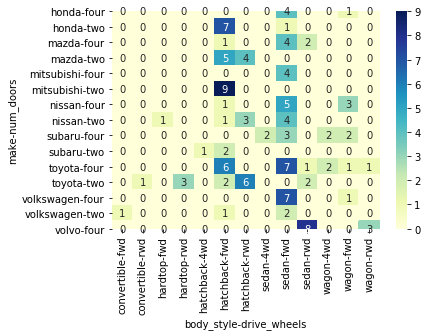

In [17]:
sns.heatmap(pd.crosstab([df.make, df.num_doors], [df.body_style, df.drive_wheels]),
            cmap="YlGnBu", annot=True, cbar=True)